In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') 
from sklearn import preprocessing
from tqdm.auto import tqdm
from collections import Counter
from matplotlib import pyplot
from pandas import DataFrame
import imblearn
print(imblearn.__version__) 

0.9.1


In [2]:
import imblearn
print(imblearn.__version__)

def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show() 

0.9.1


In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.shape

(58592, 44)

In [5]:
for columns in tqdm(df.columns):
    if dict(df.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        df[columns] = label_encoder.fit_transform(df[columns])
 

  0%|          | 0/44 [00:00<?, ?it/s]

In [6]:
from collections import Counter 
Counter(df.is_claim) 

Counter({0: 54844, 1: 3748})

<AxesSubplot:>

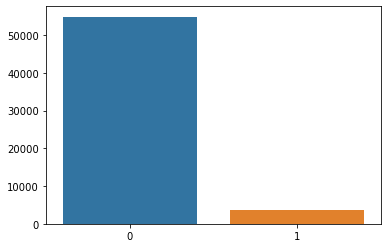

In [7]:
sns.barplot(x = [0, 1], y = [54844, 3784]) 

In [8]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int64  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int64  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int64  
 8   model                             58592 non-null  int64  
 9   fuel_type                         58592 non-null  int64  
 10  max_torque                        58592 non-null  int64  
 11  max_power                         58592 non-null  int64  
 12  engi

In [10]:
df=df.drop(["policy_id"],axis=1)   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  int64  
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  int64  
 7   model                             58592 non-null  int64  
 8   fuel_type                         58592 non-null  int64  
 9   max_torque                        58592 non-null  int64  
 10  max_power                         58592 non-null  int64  
 11  engine_type                       58592 non-null  int64  
 12  airb

In [12]:
from sklearn.feature_selection import f_regression, chi2, SelectKBest 

In [13]:
y = df['is_claim']
X = df.drop(['is_claim'], axis=1)

In [14]:
selector=SelectKBest(score_func=f_regression,k=20)
x_selected=selector.fit_transform(X,y) 

In [15]:
all_names=X.columns
selected_mask=selector.get_support() 
selected_names=all_names[selected_mask]
print('Selected naems: ', selected_names) 

Selected naems:  Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'fuel_type', 'max_torque', 'max_power',
       'is_adjustable_steering', 'is_parking_sensors', 'displacement',
       'cylinder', 'steering_type', 'width', 'is_front_fog_lights',
       'is_brake_assist', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert'],
      dtype='object')


In [16]:
features_20=['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'fuel_type', 'max_torque', 'max_power',
       'is_adjustable_steering', 'is_parking_sensors', 'displacement',
       'cylinder', 'steering_type', 'width', 'is_front_fog_lights',
       'is_brake_assist', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

Class=1, n=2587 (6.308%)
Class=0, n=38427 (93.692%)


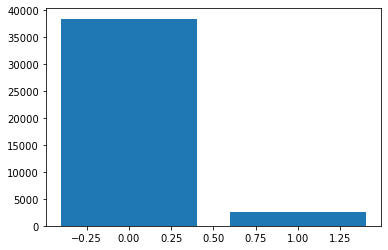

In [17]:
from sklearn.model_selection import train_test_split #train,test set 분리

train_x, test_x, train_y, test_y = train_test_split(X[features_20], y, test_size=0.3, random_state=42)
count_and_plot(train_y)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (41014, 20) (41014,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (69168, 20) (69168,)
SMOTE 적용 전 레이블 값 분포:
 0    38427
1     2587
Name: is_claim, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    38427
1    30741
Name: is_claim, dtype: int64
Class=1, n=30741 (44.444%)
Class=0, n=38427 (55.556%)


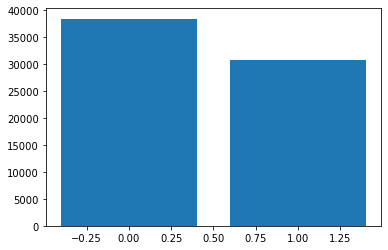

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12, sampling_strategy=0.8) 
train_x_over,train_y_over = smote.fit_resample(train_x[features_20],train_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x[features_20].shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', train_x_over.shape, train_y_over.shape)
print('SMOTE 적용 전 레이블 값 분포:\n',pd.Series(train_y).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(train_y_over).value_counts())
count_and_plot(train_y_over) 

In [19]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler   
scaler=StandardScaler() 
scaler.fit(train_x_over[features_20])
df_scaled=scaler.transform(train_x_over[features_20]) 
df_scaled=pd.DataFrame(data=df_scaled, columns=train_x_over[features_20].columns) 

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report,precision_score,recall_score,f1_score  

# model random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier  #randomforest 모델
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=1000,
                         criterion='gini',
                         max_depth=12,
                         max_features='log2',
                         min_samples_leaf=1,
                         min_samples_split=5,
                         random_state=42)
rf.fit(df_scaled,train_y_over)
rf_predicted = rf.predict(test_x[features_20])
rf_confusion_matrix=confusion_matrix(test_y,rf_predicted)  
rf_accuracy=accuracy_score(test_y, rf_predicted) 
rf_precision=precision_score(test_y,rf_predicted)
rf_recall=recall_score(test_y,rf_predicted) 
rf_f1score=f1_score(test_y, rf_predicted)  
print('accuracy: ',rf_accuracy)
print('precision: ',rf_precision)
print('recall: ' ,rf_recall) 
print("") 
print('f1_score: ',rf_f1score)   
print(rf_confusion_matrix)

# randomstate=0

accuracy:  0.9338946410285585
precision:  0.3333333333333333
recall:  0.0008613264427217916

f1_score:  0.0017182130584192437
[[16415     2]
 [ 1160     1]]


# model gradient boosting  

In [22]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(n_estimators=300,max_features='log2',learning_rate=1.8,max_depth=1, random_state=99) 
gb.fit(df_scaled,train_y_over) 
gb_predicted=gb.predict(test_x[features_20])
gb_confusion_matrix=confusion_matrix(test_y,gb_predicted) 
gb_recall=recall_score(test_y,gb_predicted)
gb_precision=precision_score(test_y,gb_predicted) 
gb_f1score=f1_score(test_y, gb_predicted) 
gb_accuracy=accuracy_score(test_y,gb_predicted) 
print('gb_accuracy: ', gb_accuracy)
print('gb_precision: ',gb_precision)
print('gb_recall: ' ,gb_recall) 
print('gb_f1-score: ',gb_f1score)   
print("")
print(gb_confusion_matrix) 


gb_accuracy:  0.9339515303219934
gb_precision:  0.0
gb_recall:  0.0
gb_f1-score:  0.0

[[16417     0]
 [ 1161     0]]


# model ada boost  

In [23]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=2000)
Ada.fit(df_scaled, train_y_over)
print('AdaBoost Classifier Training Accuracy:', Ada.score(df_scaled, train_y_over)*100) 
ada_predicted=Ada.predict(test_x[features_20])
ada_f1score=f1_score(test_y, ada_predicted)  
ada_confusion_matrix=confusion_matrix(test_y,ada_predicted)  
ada_recall=recall_score(test_y,ada_predicted)
ada_precision=precision_score(test_y,gb_predicted) 
ada_accuracy=accuracy_score(test_y,ada_predicted) 
print('ada_accuracy: ', ada_accuracy)
print('ada_precision: ',ada_precision)
print('ada_recall: ' ,ada_recall) 
print('ada_f1-score: ',ada_f1score)   
print("")
print(ada_confusion_matrix) 

AdaBoost Classifier Training Accuracy: 91.83148276659728
ada_accuracy:  0.0660484696780066
ada_precision:  0.0
ada_recall:  1.0
ada_f1-score:  0.12391269544799614

[[    0 16417]
 [    0  1161]]


# model NN

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,8),learning_rate_init=0.0001,early_stopping=False, 
                    activation='relu', solver='lbfgs', max_iter=100, shuffle=True,verbose=True)
mlp.fit(df_scaled,train_y_over) 
NN_predicted = mlp.predict(test_x[features_20])
NN_confusion_matrix=confusion_matrix(test_y,NN_predicted) 
NN_recall=recall_score(test_y,NN_predicted)
NN_precision=precision_score(test_y,NN_predicted) 
NN_f1score=f1_score(test_y, NN_predicted) 
NN_accuracy=accuracy_score(test_y,NN_predicted) 
print('NN_accuracy: ', NN_accuracy)
print('NN_precision: ',NN_precision)
print('NN_recall: ' ,NN_recall) 
print('NN_f1-score: ',NN_f1score)   
print("")
print(NN_confusion_matrix) 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4097     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96875D-01    |proj g|=  5.35741D-02

At iterate    1    f=  6.96663D-01    |proj g|=  7.83477D-02


 This problem is unconstrained.



At iterate    2    f=  6.87229D-01    |proj g|=  4.45147D-02

At iterate    3    f=  6.80205D-01    |proj g|=  7.45020D-03

At iterate    4    f=  6.78061D-01    |proj g|=  3.78859D-02

At iterate    5    f=  6.74436D-01    |proj g|=  2.42383D-02

At iterate    6    f=  6.67048D-01    |proj g|=  1.45450D-02

At iterate    7    f=  6.58849D-01    |proj g|=  7.94151D-03

At iterate    8    f=  6.55057D-01    |proj g|=  6.37667D-03

At iterate    9    f=  6.52230D-01    |proj g|=  7.58341D-03

At iterate   10    f=  6.48659D-01    |proj g|=  6.26076D-03

At iterate   11    f=  6.45720D-01    |proj g|=  5.65009D-03

At iterate   12    f=  6.44761D-01    |proj g|=  1.22305D-02

At iterate   13    f=  6.42312D-01    |proj g|=  8.88790D-03

At iterate   14    f=  6.41378D-01    |proj g|=  4.76476D-03

At iterate   15    f=  6.40458D-01    |proj g|=  5.39327D-03

At iterate   16    f=  6.38244D-01    |proj g|=  5.13632D-03

At iterate   17    f=  6.35428D-01    |proj g|=  1.07699D-02

At iter

# model Decision Tree 

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4) 
dt.fit(df_scaled,train_y_over)
dt_predicted = dt.predict(test_x[features_20])
dt_confusion_matrix=confusion_matrix(test_y,dt_predicted) 
dt_recall=recall_score(test_y,dt_predicted)
dt_precision=precision_score(test_y,dt_predicted) 
dt_f1score=f1_score(test_y, dt_predicted) 
dt_accuracy=accuracy_score(test_y,dt_predicted) 
print('dt_accuracy: ', dt_accuracy) 
print('dt_precision: ',dt_precision)
print('dt_recall: ' ,dt_recall) 
print('dt_f1-score: ',dt_f1score)   
print("") 
print(dt_confusion_matrix) 

dt_accuracy:  0.0660484696780066
dt_precision:  0.0660484696780066
dt_recall:  1.0
dt_f1-score:  0.12391269544799614

[[    0 16417]
 [    0  1161]]


# model XGBoost 

In [26]:
xgb=XGBClassifier(random_state=0, n_estimators=300)
xgb.fit(df_scaled,train_y_over) 
xgb_predicted=xgb.predict(test_x[features_20])
xgb_confusion_matrix=confusion_matrix(test_y,xgb_predicted) 
xgb_recall=recall_score(test_y,xgb_predicted)
xgb_precision=precision_score(test_y,xgb_predicted) 
xgb_f1score=f1_score(test_y, xgb_predicted) 
xgb_accuracy=accuracy_score(test_y,xgb_predicted) 
print('xgb_accuracy: ', xgb_accuracy) 
print('xgb_precision: ',xgb_precision)
print('xgb_recall: ' ,xgb_recall) 
print('xgb_f1-score: ',xgb_f1score)   
print("") 
print(xgb_confusion_matrix) 

xgb_accuracy:  0.0660484696780066
xgb_precision:  0.0660484696780066
xgb_recall:  1.0
xgb_f1-score:  0.12391269544799614

[[    0 16417]
 [    0  1161]]


# model Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression #logistic회귀분석
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(df_scaled, train_y_over)
lr_predicted = lr.predict(test_x[features_20])
lr_confusion_matrix = confusion_matrix(test_y, lr_predicted)
lr_accuracy = accuracy_score(test_y, lr_predicted)  
lr_recall=recall_score(test_y,lr_predicted)
lr_precision=precision_score(test_y,lr_predicted) 
lr_f1score=f1_score(test_y, lr_predicted)  
print('lr_accuracy: ', lr_accuracy)
print('lr_precision: ',lr_precision)
print('lr_recall: ' ,lr_recall)
print('lr_F1-score: ',lr_f1score)  
print("")
print(lr_confusion_matrix) 

lr_accuracy:  0.10894299692797815
lr_precision:  0.0667423518164436
lr_recall:  0.9621016365202412
lr_F1-score:  0.12482538973012239

[[  798 15619]
 [   44  1117]]


# model SVM 

In [28]:
# from sklearn import svm
# from sklearn.svm import SVC
# svc=svm.SVC(kernel='rbf',C=0.01) 
# svc.fit(df_scaled,train_y_over)
# svc_predicted=svc.predict(test_x[features_20])  
# svc_confusion_matrix=confusion_matrix(test_y,svc_predicted) 
# svc_accuracy=accuracy_score(test_y, svc_predicted)
# svc_recall=recall_score(test_y,svc_predicted)
# svc_precision=precision_score(test_y,svc_predicted) 
# svc_f1score=f1_score(test_y, svc_predicted) 
# print('svc_accuracy: ', svc_accuracy)
# print('svc_precision: ',svc_precision)
# print('svc_recall: ' ,svc_recall)
# print('svc_F1-score: ',svc_f1score)  
# print("")
# print(svc_confusion_matrix) 

# model knn   

In [29]:
knn = KNeighborsClassifier()
knn.fit(df_scaled, train_y_over)
knn_predicted = knn.predict(test_x[features_20])
knn_confusion_matrix = confusion_matrix(test_y, knn_predicted)
knn_accuracy= accuracy_score(test_y, knn_predicted)
knn_recall=recall_score(test_y,knn_predicted)
knn_precision=precision_score(test_y,knn_predicted) 
knn_f1score=f1_score(test_y, knn_predicted) 
print('knn_accuracy: ', knn_accuracy)
print('knn_precision: ',knn_precision)
print('knn_recall: ' ,knn_recall)
print('knn_F1-score: ',knn_f1score)  
print("") 
print(knn_confusion_matrix)

knn_accuracy:  0.7426328365001706
knn_precision:  0.08098679292300025
knn_recall:  0.27993109388458226
knn_F1-score:  0.12562814070351758

[[12729  3688]
 [  836   325]]


In [30]:
model_list = [("Neural Network",mlp),("XGBoost",xgb),("Decision Tree",dt),("Logistic Regression",lr ),
              ("KNN",knn),("Gradient Boosting", gb),("Random Forest", rf),("Ada Boosting", gb)]


for name, model in model_list:
    
    model.fit(df_scaled, train_y_over)
    
    pred_y= model.predict(test_x[features_20])
    
    score = f1_score(test_y, pred_y) 
    print(f"The test f1_score of {name} is {score}")
print("            [Select-K-Best,Oversampling]           ")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4097     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46612D-01    |proj g|=  1.77417D-01


 This problem is unconstrained.



At iterate    1    f=  6.81863D-01    |proj g|=  1.03396D-02

At iterate    2    f=  6.74944D-01    |proj g|=  8.26003D-03

At iterate    3    f=  6.67652D-01    |proj g|=  9.38812D-03

At iterate    4    f=  6.60522D-01    |proj g|=  8.41894D-03

At iterate    5    f=  6.56960D-01    |proj g|=  1.07998D-02

At iterate    6    f=  6.56140D-01    |proj g|=  2.05959D-02

At iterate    7    f=  6.54685D-01    |proj g|=  8.75280D-03

At iterate    8    f=  6.53159D-01    |proj g|=  4.65974D-03

At iterate    9    f=  6.49970D-01    |proj g|=  6.80213D-03

At iterate   10    f=  6.48161D-01    |proj g|=  4.89165D-03

At iterate   11    f=  6.47153D-01    |proj g|=  4.08335D-03

At iterate   12    f=  6.45481D-01    |proj g|=  3.02352D-03

At iterate   13    f=  6.43124D-01    |proj g|=  2.13960D-02

At iterate   14    f=  6.42120D-01    |proj g|=  1.33019D-02

At iterate   15    f=  6.40956D-01    |proj g|=  4.18926D-03

At iterate   16    f=  6.40465D-01    |proj g|=  2.71392D-03

At iter